In [273]:
%matplotlib notebook

import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
import skimage.segmentation
import skimage.filters
import skimage.transform
import scipy
import numpy as np
import sklearn

from pydash import py_

from cad.metrics import geometry, exposure

In [274]:
img = skimage.io.imread('/d/blimp/f1.jpg')
eim = exposure.equalize(img)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


<IPython.core.display.Javascript object>


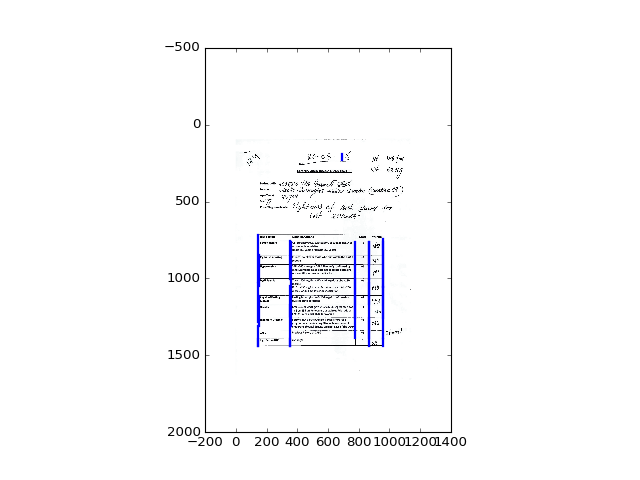

In [3]:
axis = 0

segs = geometry._filter_lines(eim, axis=axis, length=40, gap=0.5, sigma=1, threshold=50)

lines = geometry.infer_lines_span(segs, axis=axis)

plt.imshow(eim, cmap=plt.cm.bone)


for l in lines:
  a, b = l
  plt.plot(*zip(a, b), 'b', linewidth=2)

<IPython.core.display.Javascript object>


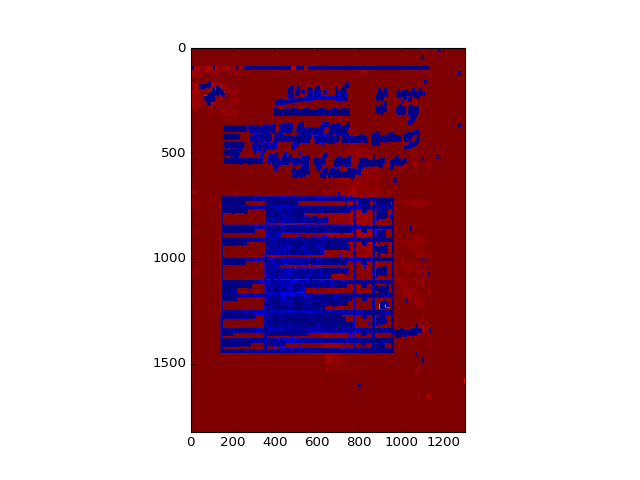

In [259]:
se = skimage.morphology.rectangle(20, 10, dtype='float64')
op = skimage.morphology.erosion(eim, se)
# cn = skimage.feature.canny(op, 1)

# lines = geometry._filter_lines(op, axis=1, length=400)
# se = skimage.morphology.rectangle(10, 3, dtype='float64')
# oc = skimage.morphology.closing(op, se)

plt.imshow(op)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


<IPython.core.display.Javascript object>


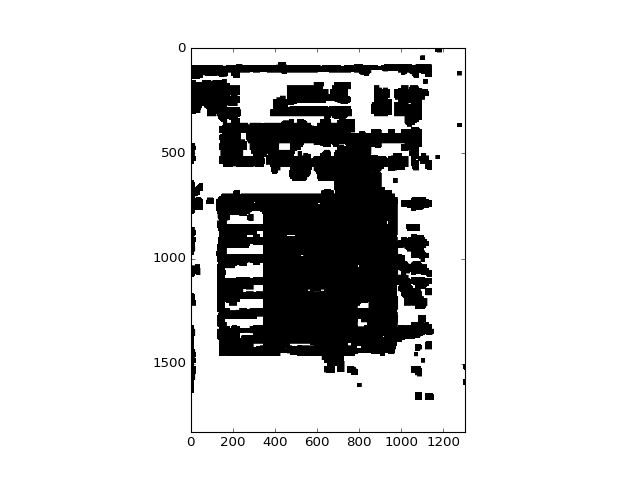

In [271]:
se = skimage.morphology.rectangle(20, 20, dtype='float64')
op = skimage.morphology.erosion(eim, se)
# cn = skimage.feature.canny(op, 1)

# lines = geometry._filter_lines(op, axis=1, length=400)
# se = skimage.morphology.rectangle(10, 3, dtype='float64')
# oc = skimage.morphology.closing(op, se)

plt.imshow(skimage.morphology.remove_small_objects(op.astype('int')), cmap=plt.cm.bone)

<IPython.core.display.Javascript object>


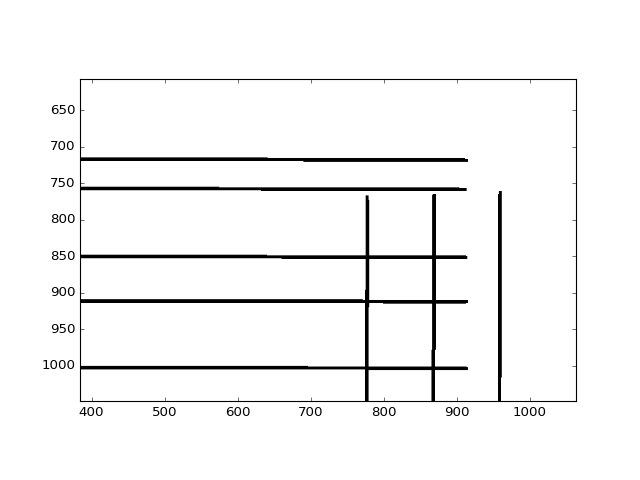

In [299]:
se = skimage.morphology.square(4)

v_f = skimage.filters.gaussian(eim, sigma=(50, 0), mode='reflect') < 0.2
h_f = skimage.filters.gaussian(eim, sigma=(0, 50), mode='reflect') < 0.2
c_i = v_f | h_f
o_i = skimage.morphology.binary_dilation(c_i, se)
plt.imshow(o_i, cmap=plt.cm.bone_r)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)